# Forecasting flight delays
## Reading the data
Features discription:
- Month, DayofMonth, DayOfWeek - month, day of month, day of week
- DepTime - departure time
- UniqueCarrier - carrier code
- Origin - place of departure
- Dest - place of destination
- Distance - distance between airports
- dep_delayed_15min - delay of departure by 15 minutes or more (target sign)

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [63]:
train_data = pd.read_csv("data/flight_delays_train.csv")
train_data.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


In [64]:
train_df = train_data.copy()

## EDA
### Transformind data

In [65]:
for column in ["Month", "DayofMonth", "DayOfWeek"]:
    train_df[column] = train_df[column].apply(lambda code: int(code[2:]))

train_df["delayed"] = train_df["dep_delayed_15min"].apply(lambda v: int(v == 'Y'))
train_df.drop(columns=['dep_delayed_15min'], inplace=True)

In [66]:
train_df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,delayed
0,8,21,7,1934,AA,ATL,DFW,732,0
1,4,20,3,1548,US,PIT,MCO,834,0
2,9,2,5,1422,XE,RDU,CLE,416,0
3,11,25,6,1015,OO,DEN,MEM,872,0
4,10,7,6,1828,WN,MDW,OMA,423,1


### Data analusis

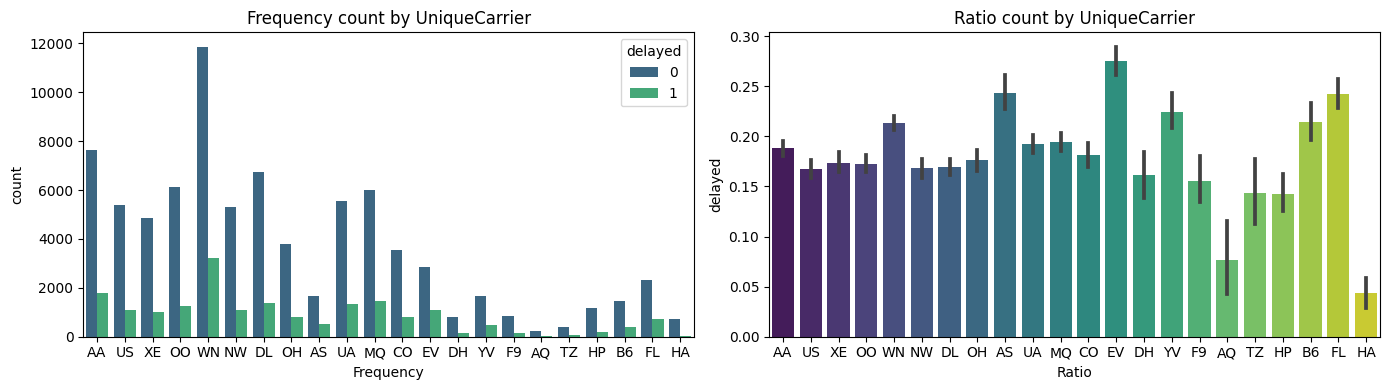

In [76]:
column = "UniqueCarrier"

# Create a bar plot for each categorical column
plt.figure(figsize=(14, 4))
# fig, axes = plt.subplots(1, 2, sharex=True, figsize=(14, 4))

# count plot divided by delayed feature
plt.subplot(2, 1, 1)
sns.countplot(data=train_df, x=column, hue="delayed", palette="viridis", ax=axes[0])
# axes[0].xticks(rotation=45)
plt.xlabel("Frequency")
plt.title(f"Frequency count by {column}")

# Ratio of delays to the total number of flights
plt.subplot(2, 1, 2)
sns.barplot(data=train_df, x=column, y="delayed", palette="viridis", ax=axes[1])
# axes[1].xticks(rotation=45)
axes[1].set_xlabel("Ratio")
axes[1].set_title(f"Ratio count by {column}")

plt.tight_layout()
# plt.show()

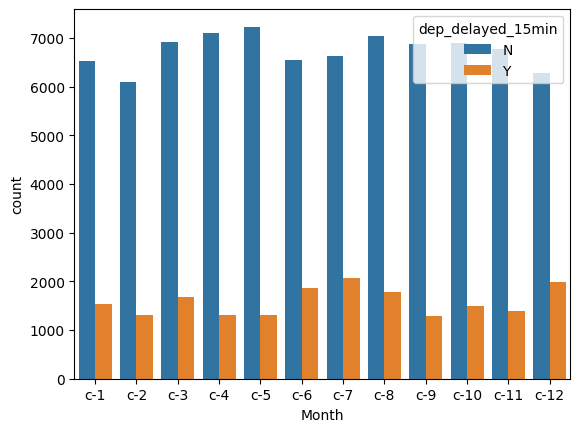